**Chapter 3 – Classification**

_This notebook contains all the sample code and solutions to the exercises in chapter 3._

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/03_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

This project requires Python 3.7 or above:

In [1]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

Just like in the previous chapter, let's define the default font sizes to make the figures prettier:

In [3]:
# pip install matplotlib

In [4]:
# pip install pandas

In [5]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

And let's create the `images/classification` folder (if it doesn't already exist), and define the `save_fig()` function which is used through this notebook to save the figures in high-res for the book:

In [6]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# MNIST

In [7]:
import pandas as pd

In [5]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

c:\Users\Earl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [14]:
# extra code – it's a bit too long
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [15]:
mnist.keys()  # extra code – we only use data and target in this notebook

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
X, y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
type(X)

numpy.ndarray

In [24]:
type(y)

numpy.ndarray

In [17]:
X.shape

(70000, 784)

In [18]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [19]:
y.shape

(70000,)

In [20]:
28 * 28

784

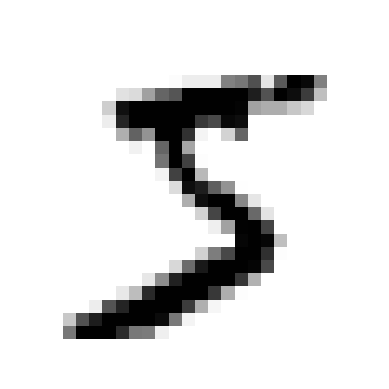

In [22]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
# save_fig("some_digit_plot")  # extra code
plt.show()

In [14]:
y[0]

'5'

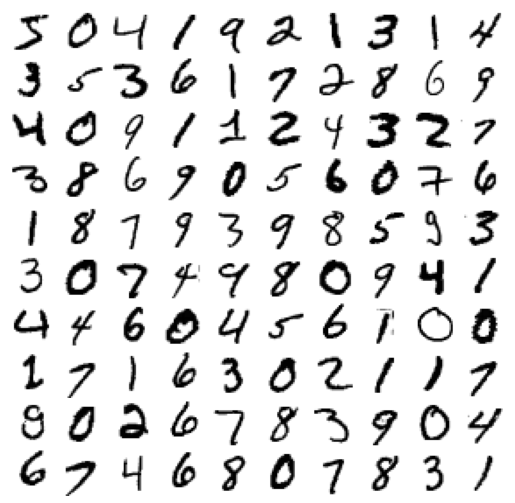

In [15]:
# extra code – this cell generates and saves Figure 3–2
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
save_fig("more_digits_plot", tight_layout=False)
plt.show()

In [16]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier

In [17]:
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

In [18]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [19]:
sgd_clf.predict([some_digit])

array([ True])

# Performance Measures

## Measuring Accuracy Using Cross-Validation

In [20]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)  # add shuffle=True if the dataset is not
                                       # already shuffled
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [22]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [23]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

## Confusion Matrix

In [24]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [26]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

## Precision and Recall

In [27]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)  # == 3530 / (687 + 3530)

0.8370879772350012

In [28]:
# extra code – this cell also computes the precision: TP / (FP + TP)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8370879772350012

In [29]:
recall_score(y_train_5, y_train_pred)  # == 3530 / (1891 + 3530)

0.6511713705958311

In [30]:
# extra code – this cell also computes the recall: TP / (FN + TP)
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.6511713705958311

In [31]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [32]:
# extra code – this cell also computes the f1 score
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7325171197343847

## Precision/Recall Trade-off

In [33]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [34]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [35]:
y_some_digit_pred

array([ True])

In [36]:
# extra code – just shows that y_scores > 0 produces the same result as
#              calling predict()
y_scores > 0

array([ True])

In [37]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [38]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [39]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

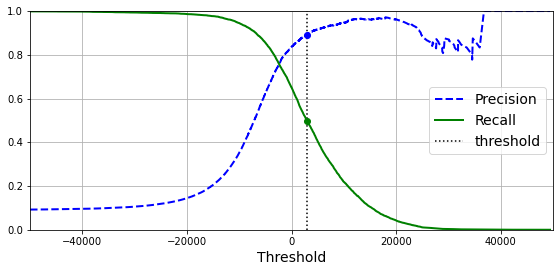

In [40]:
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
save_fig("precision_recall_vs_threshold_plot")

plt.show()

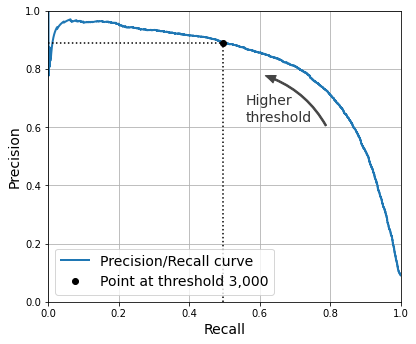

In [41]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("precision_vs_recall_plot")

plt.show()

In [42]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [43]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [44]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [45]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

## The ROC Curve

In [46]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

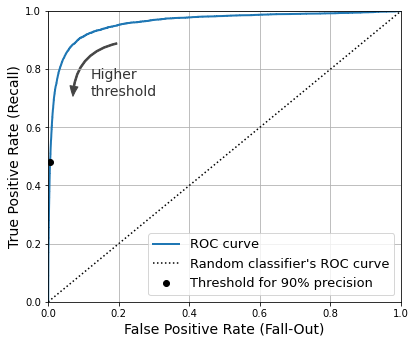

In [47]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
save_fig("roc_curve_plot")

plt.show()

In [48]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

**Warning:** the following cell may take a few minutes to run.

In [49]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [50]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [51]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

These are _estimated probabilities_. Among the images that the model classified as positive with a probability between 50% and 60%, there are actually about 94% positive images:

In [52]:
# Not in the code
idx_50_to_60 = (y_probas_forest[:, 1] > 0.50) & (y_probas_forest[:, 1] < 0.60)
print(f"{(y_train_5[idx_50_to_60]).sum() / idx_50_to_60.sum():.1%}")

94.0%


In [53]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest)

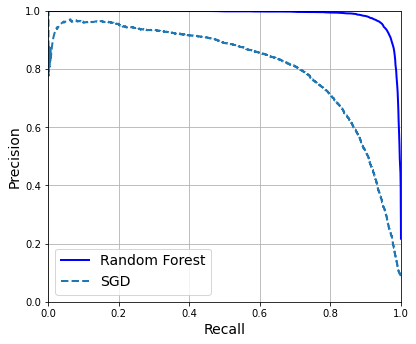

In [54]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# extra code – just beautifies and saves Figure 3–8
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("pr_curve_comparison_plot")

plt.show()

We could use `cross_val_predict(forest_clf, X_train, y_train_5, cv=3)` to compute `y_train_pred_forest`, but since we already have the estimated probabilities, we can just use the default threshold of 50% probability to get the same predictions much faster:

In [55]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # positive proba ≥ 50%
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [56]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [57]:
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

In [58]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

# Multiclass Classification

SVMs do not scale well to large datasets, so let's only train on the first 2,000 instances, or else this section will take a very long time to run:

In [59]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])  # y_train, not y_train_5

SVC(random_state=42)

In [60]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [61]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [62]:
class_id = some_digit_scores.argmax()
class_id

5

In [63]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [64]:
svm_clf.classes_[class_id]

'5'

If you want `decision_function()` to return all 45 scores, you can set the `decision_function_shape` hyperparameter to `"ovo"`. The default value is `"ovr"`, but don't let this confuse you: `SVC` always uses OvO for training. This hyperparameter only affects whether or not the 45 scores get aggregated or not:

In [65]:
# extra code – shows how to get all 45 OvO scores if needed
svm_clf.decision_function_shape = "ovo"
some_digit_scores_ovo = svm_clf.decision_function([some_digit])
some_digit_scores_ovo.round(2)

array([[ 0.11, -0.21, -0.97,  0.51, -1.01,  0.19,  0.09, -0.31, -0.04,
        -0.45, -1.28,  0.25, -1.01, -0.13, -0.32, -0.9 , -0.36, -0.93,
         0.79, -1.  ,  0.45,  0.24, -0.24,  0.25,  1.54, -0.77,  1.11,
         1.13,  1.04,  1.2 , -1.42, -0.53, -0.45, -0.99, -0.95,  1.21,
         1.  ,  1.  ,  1.08, -0.02, -0.67, -0.14, -0.3 , -0.13,  0.25]])

In [66]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [67]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [68]:
len(ovr_clf.estimators_)

10

In [69]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [70]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

**Warning:** the following two cells may take a few minutes each to run:

In [71]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

# Error Analysis

**Warning:** the following cell will take a few minutes to run:

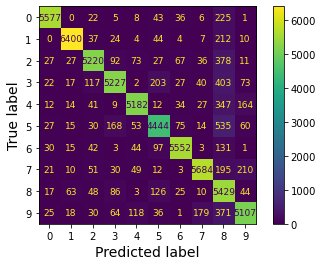

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

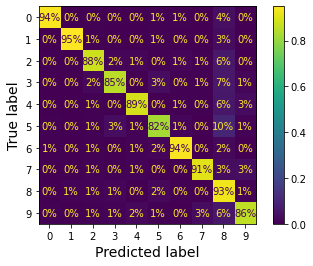

In [74]:
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")
plt.show()

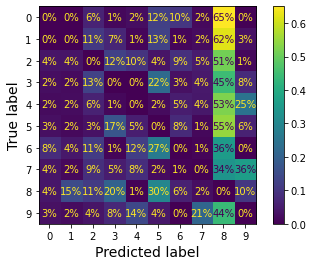

In [75]:
sample_weight = (y_train_pred != y_train)
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
plt.show()

Let's put all plots in a couple of figures for the book:

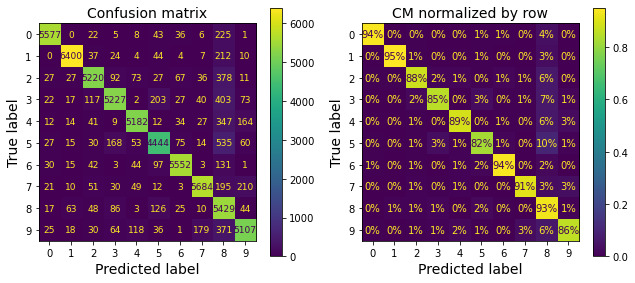

In [76]:
# extra code – this cell generates and saves Figure 3–9
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
save_fig("confusion_matrix_plot_1")
plt.show()

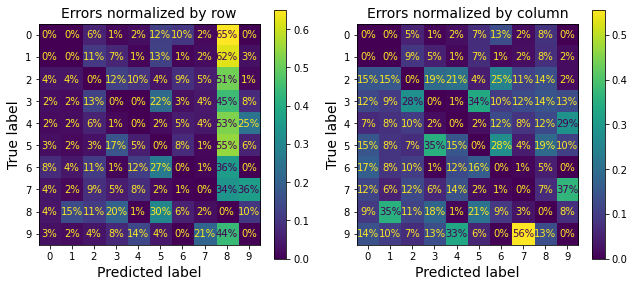

In [77]:
# extra code – this cell generates and saves Figure 3–10
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
save_fig("confusion_matrix_plot_2")
plt.show()
plt.rc('font', size=14)  # make fonts great again

In [78]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

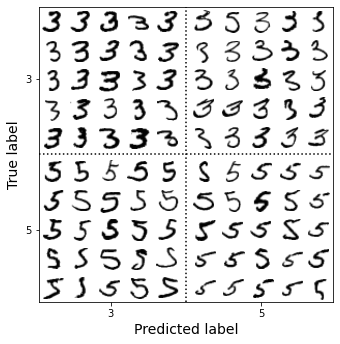

In [79]:
# extra code – this cell generates and saves Figure 3–11
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
save_fig("error_analysis_digits_plot")
plt.show()

Note: there are several other ways you could code a plot like this one, but it's a bit hard to get the axis labels right:
* using [nested GridSpecs](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/gridspec_nested.html)
* merging all the digits in each block into a single image (then using 2×2 subplots). For example:
    ```python
    X_aa[:25].reshape(5, 5, 28, 28).transpose(0, 2, 1, 3).reshape(5 * 28, 5 * 28)
    ```
* using [subfigures](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subfigures.html) (since Matplotlib 3.4)

# Multilabel Classification

In [80]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [81]:
knn_clf.predict([some_digit])

array([[False,  True]])

**Warning**: the following cell may take a few minutes to run:

In [82]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

In [83]:
# extra code – shows that we get a negligible performance improvement when we
#              set average="weighted" because the classes are already pretty
#              well balanced.
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9778357403921755

In [84]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [85]:
chain_clf.predict([some_digit])

array([[0., 1.]])

# Multioutput Classification

In [86]:
np.random.seed(42)  # to make this code example reproducible
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

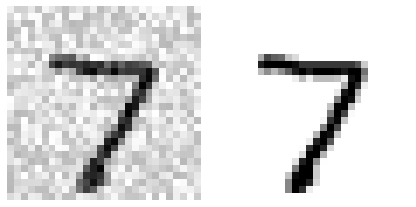

In [87]:
# extra code – this cell generates and saves Figure 3–12
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
save_fig("noisy_digit_example_plot")
plt.show()

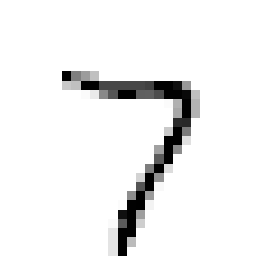

In [88]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")  # extra code – saves Figure 3–13
plt.show()

# Exercise solutions

## 1. An MNIST Classifier With Over 97% Accuracy

Exercise: _Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the `KNeighborsClassifier` works quite well for this task; you just need to find good hyperparameter values (try a grid search on the `weights` and `n_neighbors` hyperparameters)._

In [8]:
X.shape, y.shape

((70000, 784), (70000,))

In [9]:
from sklearn.model_selection import train_test_split

# Split in train and test set via slicing since dataset was aleady shuffled
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [103]:
# UNCOMMENT - IF need to check other values for "score" param of GridSearchCV
# sklearn.metrics.get_scorer_names()

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Initialize classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform')

# Set hyperparameter values for tuning
param_grid = {'n_neighbors':[3, 5, 7, 9], 'weights':['uniform', 'distance']}

# Search for best params and train the best estimator
grid_search = GridSearchCV(knn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [12]:
# Look for best values per hyperparameter
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [43]:
# Check performance of best estimator
grid_search.best_score_

0.9711166666666665

In [14]:
# Get the best estimator 
final_model = grid_search.best_estimator_

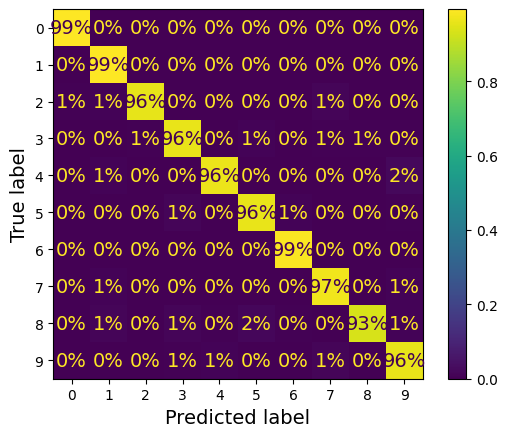

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

# Get predictions using training set using best estimator
y_train_pred = cross_val_predict(final_model, X_train, y_train, cv=3)

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")
plt.show()

Above 97% accuracy reached!

In [16]:
# Check performance of model on test set
final_model.score(X_test, y_test)

0.9717

## 2. Data Augmentation

Exercise: _Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. You can use the `shift()` function from the `scipy.ndimage` module. For example, `shift(image, [2, 1], cval=0)` shifts the image two pixels down and one pixel to the right. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called _data augmentation_ or _training set expansion_._

In [18]:
from scipy.ndimage import shift
import numpy as np

# Get shifted versions of train set images
X_train_left = shift(X_train, [0, -1], cval=0)
X_train_right = shift(X_train, [0, 1], cval=0)
X_train_up = shift(X_train, [-1, 0], cval=0)
X_train_down = shift(X_train, [1, 0], cval=0)

# Data augmentation of training set
X_train_expd = np.concatenate((X_train, X_train_left, X_train_right, X_train_up, X_train_down), axis=0)

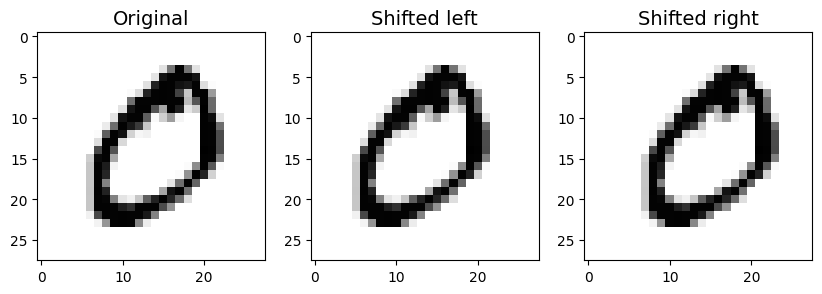

In [19]:
# Check shifted images
plt.figure(figsize=(10, 3))

plt.subplot(131)
plt.title("Original")
plt.imshow(X_train[1].reshape(28,28), cmap='Greys')

plt.subplot(132)
plt.title("Shifted left")
plt.imshow(X_train_left[1].reshape(28,28), cmap='Greys')

plt.subplot(133)
plt.title("Shifted right")
plt.imshow(X_train_right[1].reshape(28,28), cmap='Greys')

In [20]:
# Expand y_train based on augmented data 
y_train_expd = np.tile(y_train, 5)

In [21]:
# Shuffle grouped images
shuffle_idx = np.random.permutation(len(X_train_expd))
X_train_expd = X_train_expd[shuffle_idx]
y_train_expd = y_train_expd[shuffle_idx]

In [22]:
X_train_expd.shape, y_train_expd.shape

((300000, 784), (300000,))

In [23]:
# Use best params of KNN Classifier derived earlier
knn_classifier = KNeighborsClassifier(**grid_search.best_params_)
knn_classifier.fit(X_train_expd, y_train_expd)

KNeighborsClassifier(n_neighbors=3, weights='distance')

It became worse??

In [24]:
# Check performance of model on test set
knn_classifier.score(X_test, y_test)

0.8319

## 3. Tackle the Titanic dataset

Exercise: _Tackle the Titanic dataset. A great place to start is on [Kaggle](https://www.kaggle.com/c/titanic). Alternatively, you can download the data from https://homl.info/titanic.tgz and unzip this tarball like you did for the housing data in Chapter 2. This will give you two CSV files: _train.csv_ and _test.csv_ which you can load using `pandas.read_csv()`. The goal is to train a classifier that can predict the `Survived` column based on the other columns._

In [8]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np

def load_titanic_data():
    tarball_path = Path("datasets/titanic.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/titanic.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as titanic_tarball:
            titanic_tarball.extractall(path="datasets")
    return [pd.read_csv(Path("datasets/titanic") / filename)
            for filename in ("train.csv", "test.csv")]

In [9]:
train_data, test_data = load_titanic_data()

In [10]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
train_data.PassengerId.nunique()

891

In [13]:
# Set PassengerId as identifier and not a feature
train_data.set_index("PassengerId", inplace=True)
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen 'Carrie'",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## EDA

### A. Univariate analysis

#### 1. Categorical cols

- **Survived (LABEL)**: 38% did not survive
- **Pclass**: 55% are class 3 (Lower)
- **Sex**: Almost 65% are male
- **Embarked**: 72% are going to S (Southampton)
- **Cabin**: 77% are null. For the remaining 23%, the most common starts with C (6.6%) and B (5.2%). Assuming each letter pertains to floor or area where rooms were grouped together, this might be a good geospatial feature. Although, 77% nulls might be hard to impute. We can assume that they share the same location like the main cabin where there are multiple double decks but it might be an oversimplification 
    - We can check in bivariate analysis if there are clusterings formed with other features


In [25]:
train_data.Survived.value_counts(dropna = False, normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [26]:
train_data.Pclass.value_counts(dropna = False, normalize=True)

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

In [27]:
train_data.Sex.value_counts(dropna = False, normalize=True)

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

In [28]:
train_data.Embarked.value_counts(dropna = False, normalize=True)

Embarked
S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: proportion, dtype: float64

In [29]:
train_data.Cabin.value_counts(dropna = False, normalize=True)

Cabin
NaN            0.771044
C23 C25 C27    0.004489
G6             0.004489
B96 B98        0.004489
C22 C26        0.003367
                 ...   
E34            0.001122
C7             0.001122
C54            0.001122
E36            0.001122
C148           0.001122
Name: proportion, Length: 148, dtype: float64

In [30]:
train_data.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [31]:
train_data["CabinFirstLetter"] = np.where(train_data.Cabin.notnull(), train_data.Cabin.str[0], '')
train_data.CabinFirstLetter.value_counts(dropna = False, normalize=True)

CabinFirstLetter
     0.771044
C    0.066218
B    0.052750
D    0.037037
E    0.035915
A    0.016835
F    0.014590
G    0.004489
T    0.001122
Name: proportion, dtype: float64

#### 2. Numerical cols

- **Age**: Majority are from range of 18 to 29 yrs old. 
    - There are group of infants with fractional age
    - Oldest is 80 yrs old
- **SibSp**: 68% doesnt have sibling/spouse with them. Might be with parents/child
- **Parch**: 78% doesnt have parents/child with them. Might be with sibling/spouse
    - **FamOnboard**: 60% of passengers are alone
- **Fare**: Most fares are priced from free to 31 euros

In [32]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
# Infant group
train_data.query('Age < 1')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinFirstLetter
PassengerId,,,,,,,,,,,,
79,1,2,"Caldwell, Master. Alden Gates",male,0.8333,0,2,248738,29.0000,NaN,S,
306,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,C
470,1,3,"Baclini, Miss. Helene Barbara",female,0.7500,2,1,2666,19.2583,NaN,C,
645,1,3,"Baclini, Miss. Eugenie",female,0.7500,2,1,2666,19.2583,NaN,C,
756,1,2,"Hamalainen, Master. Viljo",male,0.6667,1,1,250649,14.5000,NaN,S,
804,1,3,"Thomas, Master. Assad Alexander",male,0.4167,0,1,2625,8.5167,NaN,C,
832,1,2,"Richards, Master. George Sibley",male,0.8333,1,1,29106,18.7500,NaN,S,


In [34]:
train_data.SibSp.value_counts(dropna = False, normalize=True)

SibSp
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: proportion, dtype: float64

In [35]:
train_data.Parch.value_counts(dropna = False, normalize=True)

Parch
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: proportion, dtype: float64

In [36]:
# Derive a new col counting total number of family onboard
train_data.FamOnboard = train_data.SibSp + train_data.Parch
train_data.FamOnboard.value_counts(dropna = False, normalize=True)

C:\Users\Earl\AppData\Local\Temp\ipykernel_2352\3585697780.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train_data.FamOnboard = train_data.SibSp + train_data.Parch


0     0.602694
1     0.180696
2     0.114478
3     0.032548
5     0.024691
4     0.016835
6     0.013468
10    0.007856
7     0.006734
Name: proportion, dtype: float64

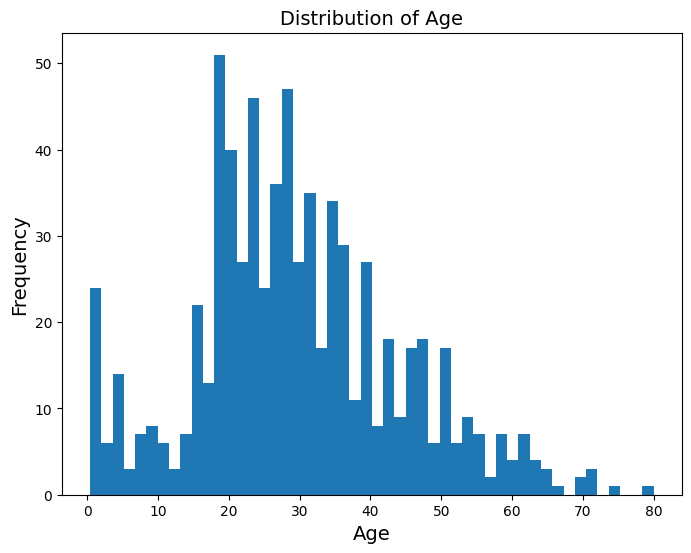

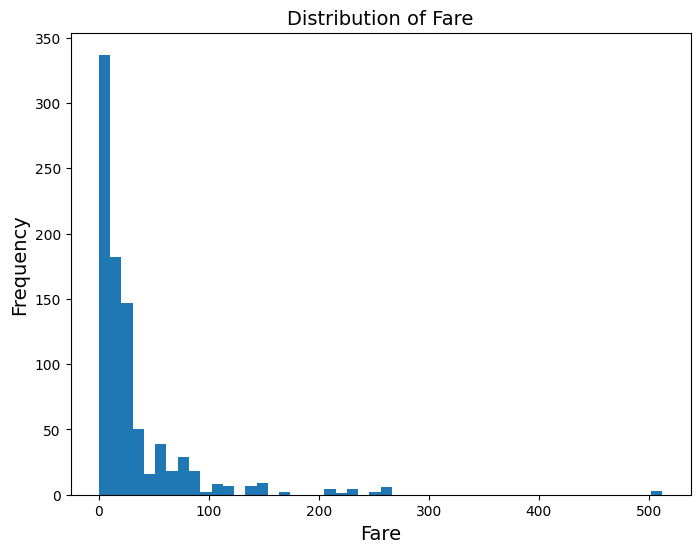

In [37]:
# iterate through the numerical columns
for col in train_data.select_dtypes(include=['float']):
    # create the plot
    fig, ax = plt.subplots(figsize=(8, 6))
    train_data[col].plot(kind='hist', ax=ax, bins=50)
    
    # set plot properties
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title('Distribution of {}'.format(col))

    # show the plot
    plt.show()

### B. Bivariate analysis

#### 1. Cabin and others

Let's call the "most occupied area" as Z and hope to find patterns with different groups

Such cabin looks like the sample image below

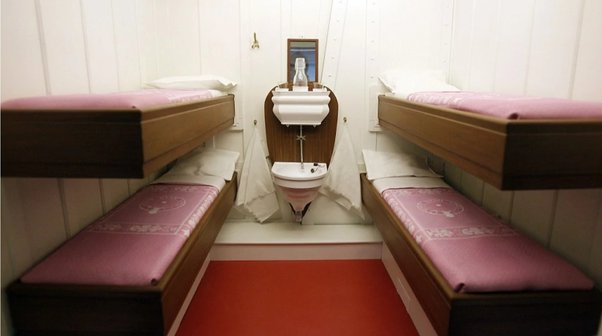

RESULTS:
- As expected, most of lower class (55% of sample) doesn't have a private cabin and this might be because cabins with letters are expensive and they can only afford to go on shared cabin with lots of double decks
    - HENCE, we can use Cabin as geospatial feature but might have high correlation with Pclass tho only for Pclass = 1
    - Distribution still the same when broken down to Sex and Embarked
    - Most are adults (young and senior) as expected since majority of passengers are also adults
    - Most fares are also cheap (might need to check correlation between fares and pclass as they might be related)
    - Majority are alone, confirming further the use case of double beds

In [38]:
# pip install seaborn

In [39]:
train_data.Cabin.fillna('Z', inplace=True)

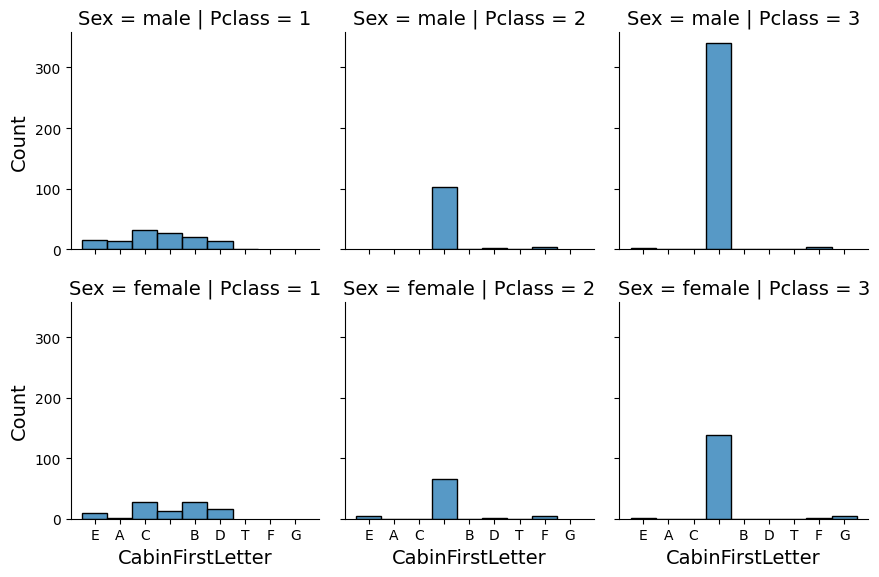

In [40]:
import seaborn as sns

g = sns.FacetGrid(train_data, col="Pclass", row="Sex")
g.map_dataframe(sns.histplot, x="CabinFirstLetter")

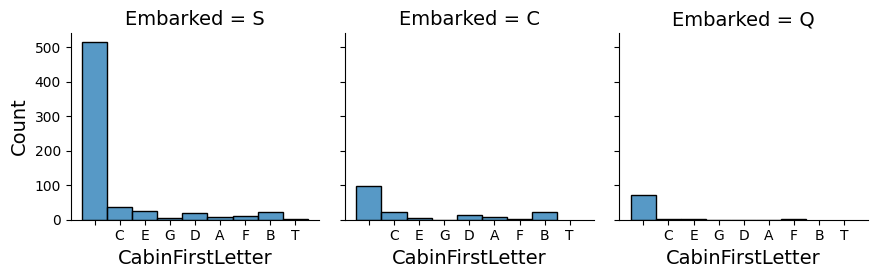

In [41]:
g = sns.FacetGrid(train_data, col="Embarked")
g.map_dataframe(sns.histplot, x="CabinFirstLetter")

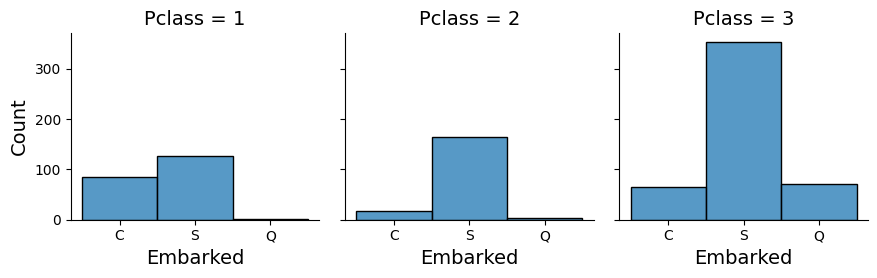

In [42]:
g = sns.FacetGrid(train_data, col="Pclass")
g.map_dataframe(sns.histplot, x="Embarked")

We can bucketize age based on the age group of people

In [43]:
age_range = [train_data["Age"].between(0,1), 
                train_data["Age"].between(1,12), 
                train_data["Age"].between(12,18), 
                train_data["Age"].between(18,30), 
                train_data["Age"].between(30,60), 
                train_data["Age"].between(60,np.inf)]
age_group = ["Infant", 
             "Kid",
             "Teen",
             "YoungAdult",
             "Adult",
             "Elderly"]

train_data["AgeBucket"] = np.select(age_range, age_group, 'NULL')

In [44]:
train_data[train_data["AgeBucket"] == "NULL"].Age.unique()

array([nan])

In [45]:
train_data.AgeBucket.value_counts(dropna = False, normalize=True)

AgeBucket
Adult         0.317621
YoungAdult    0.303030
NULL          0.198653
Teen          0.078563
Kid           0.061728
Elderly       0.024691
Infant        0.015713
Name: proportion, dtype: float64

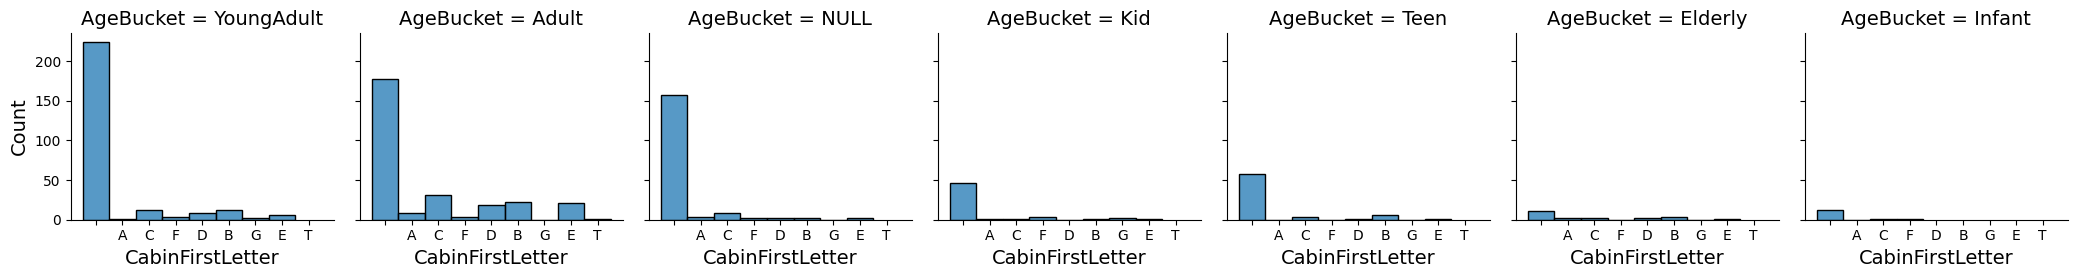

In [46]:
g = sns.FacetGrid(train_data, col="AgeBucket")
g.map_dataframe(sns.histplot, x="CabinFirstLetter")
# g.set_xticklabels(rotation=45)

Do the same thing with Fares

In [47]:
fare_range = [train_data["Fare"].between(0,15), 
                train_data["Fare"].between(15,32), 
                train_data["Fare"].between(32,100), 
                train_data["Fare"].between(100,np.inf)]
fare_group = ["Cheap", 
             "Average",
             "Premium",
             "Expensive"]

train_data["FareBucket"] = np.select(fare_range, fare_group, 'NULL')

In [48]:
train_data.FareBucket.value_counts(dropna = False, normalize=True)

FareBucket
Cheap        0.514029
Average      0.249158
Premium      0.177329
Expensive    0.059484
Name: proportion, dtype: float64

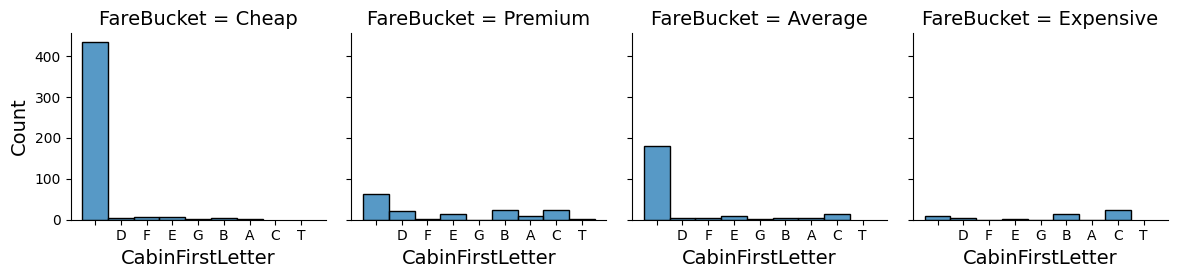

In [49]:
g = sns.FacetGrid(train_data, col="FareBucket")
g.map_dataframe(sns.histplot, x="CabinFirstLetter")
# g.set_xticklabels(rotation=45)

In [50]:
train_data.AgeBucket.value_counts(dropna = False, normalize=True)

AgeBucket
Adult         0.317621
YoungAdult    0.303030
NULL          0.198653
Teen          0.078563
Kid           0.061728
Elderly       0.024691
Infant        0.015713
Name: proportion, dtype: float64

NO CORRELATION between Pclass and fare
- There are class 1 with cheap fares and class 3 with premium fares
- THUS, we can also use fare as feature

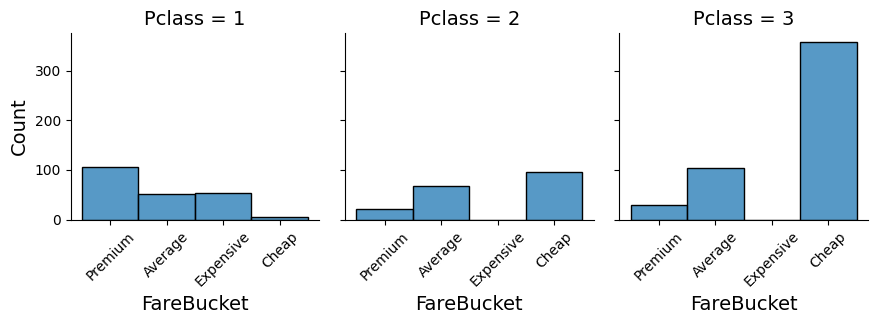

In [51]:
g = sns.FacetGrid(train_data, col="Pclass")
g.map_dataframe(sns.histplot, x="FareBucket")
g.set_xticklabels(rotation=45)

Derive a new feature based from total number of FamOnboard

In [52]:
train_data["IsAlone"] = np.where(train_data.FamOnboard == 0, 'YES', 'NO')

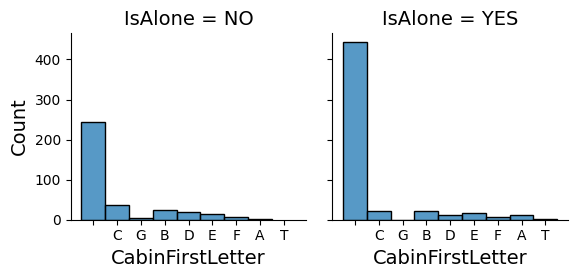

In [53]:
g = sns.FacetGrid(train_data, col="IsAlone")
g.map_dataframe(sns.histplot, x="CabinFirstLetter")

#### 2. Age and others

**RESULTS**:
- Most kids, teens, and adults are in class 3 
- Majority of infants, adults, and elderly are male

**TREATING NULL VALUES**:
- Since majority are young adult and adults, we'll use the mean of this group to impute the age
- *QUESTION*: How can we automate this EDA of finding which group are the majority, then use that group for imputation?

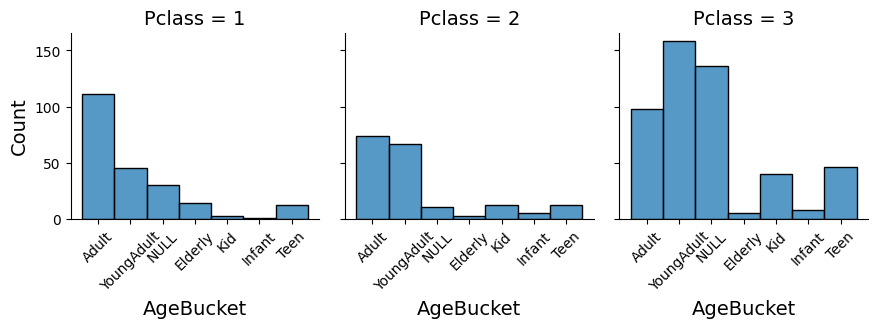

In [54]:
g = sns.FacetGrid(train_data, col="Pclass")
g.map_dataframe(sns.histplot, x="AgeBucket")
g.set_xticklabels(rotation=45)

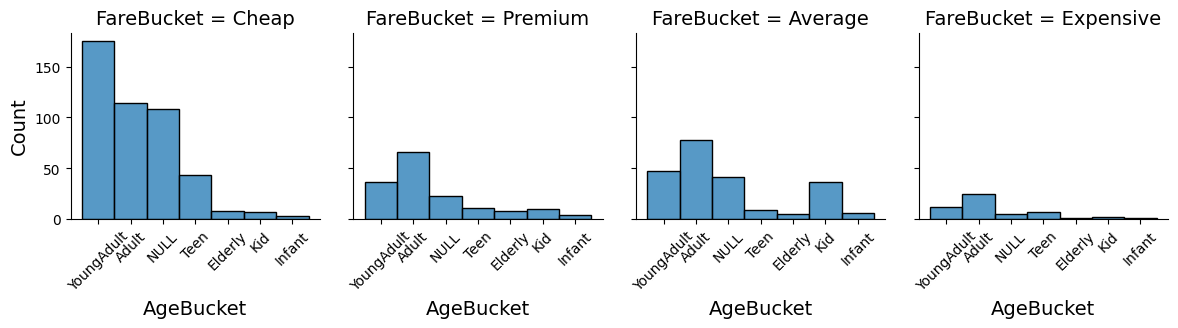

In [55]:
g = sns.FacetGrid(train_data, col="FareBucket")
g.map_dataframe(sns.histplot, x="AgeBucket")
g.set_xticklabels(rotation=45)

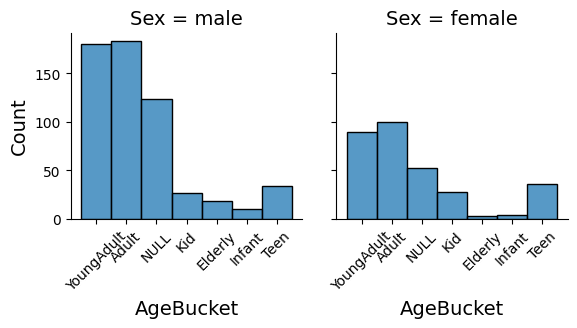

In [56]:
g = sns.FacetGrid(train_data, col="Sex")
g.map_dataframe(sns.histplot, x="AgeBucket")
g.set_xticklabels(rotation=45)

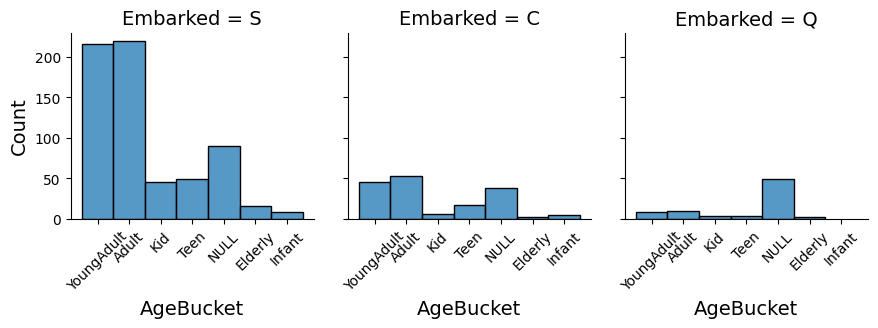

In [57]:
g = sns.FacetGrid(train_data, col="Embarked")
g.map_dataframe(sns.histplot, x="AgeBucket")
g.set_xticklabels(rotation=45)

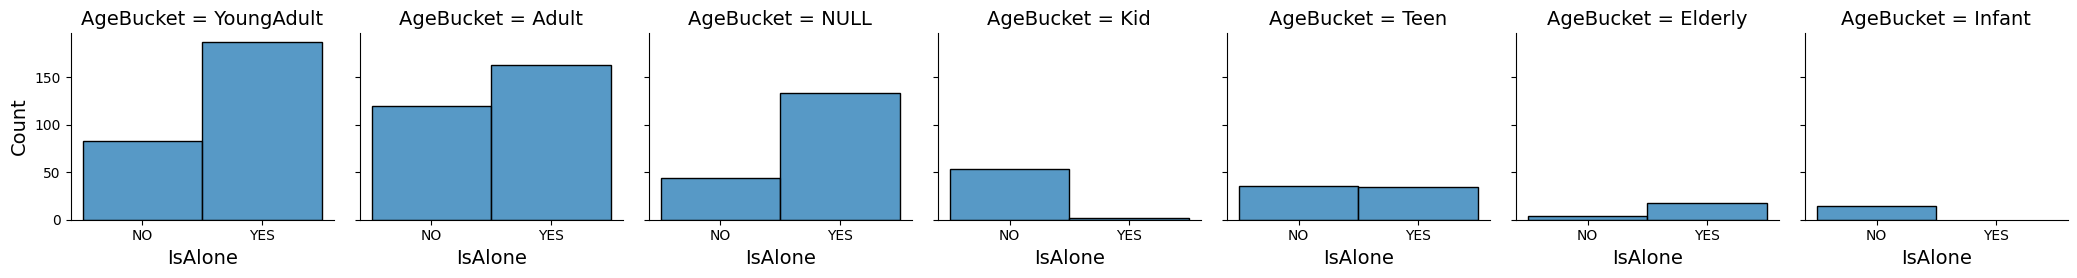

In [58]:
g = sns.FacetGrid(train_data, col="AgeBucket")
g.map_dataframe(sns.histplot, x="IsAlone")

#### 3. Survived and others

Finding correlations between label and features

RESULTS:
- Most survived in class 1 while most did not in class 3 = Bias in rescue priority? Might be related to their cabin placement, VIP rooms might be easier to access as there are no crowds
- Majority young adults and eldery did not survive while most infants survived = Infant case is surprising as it might hinder the adults who were with them. Maybe they were the very first priority during rescue?
- Lots of females did not survived = Biologically weaker than male
- Obvious difference that those who did not survive are alone = Being alone means lower chance of getting help
- Those with cheap fares did not survive while the expensive ones survive = Bias in rescue priority?
- Most survived in areas B, D, E while majority did not in Z (as mostly are there) = Might be related to the architecture of titanic. Maybe the three areas are above or near the rescue boats
- Embarked to S didnt mostly survived tho it's also the majority (72%) so it might be because of sampling bias = **DO NOT USE**

THEN, since majority of cols above seems correlated to survival, they will be used as features of model

In [140]:
# Convert to str since it's only a flag
train_data.Survived = train_data.Survived.astype('str')

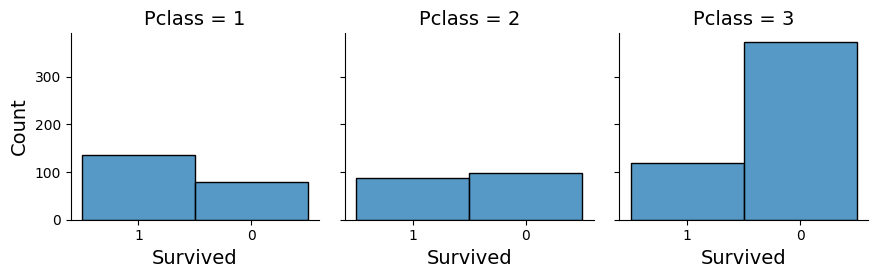

In [142]:
g = sns.FacetGrid(train_data, col="Pclass")
g.map_dataframe(sns.histplot, x="Survived")

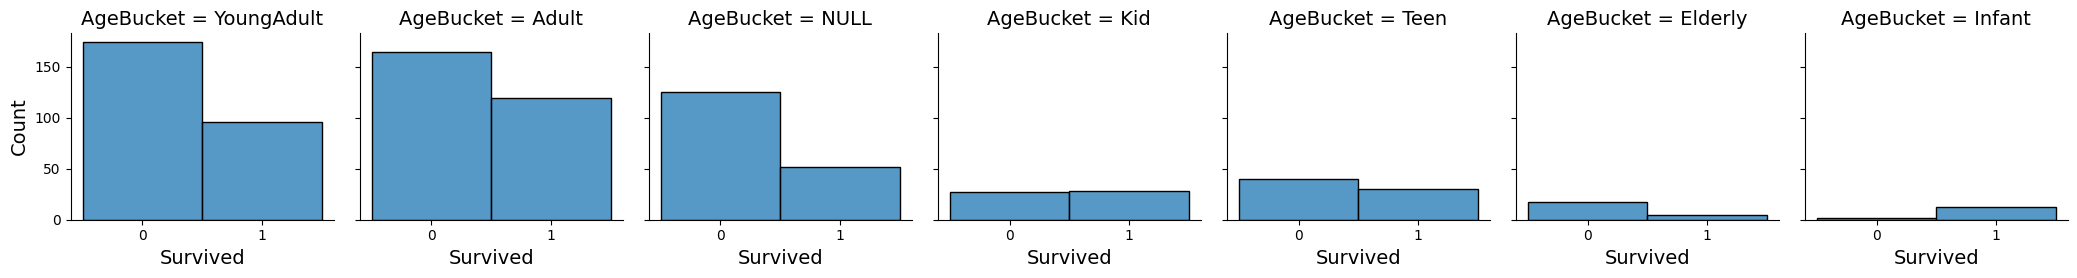

In [149]:
g = sns.FacetGrid(train_data, col="AgeBucket")
g.map_dataframe(sns.histplot, x="Survived")

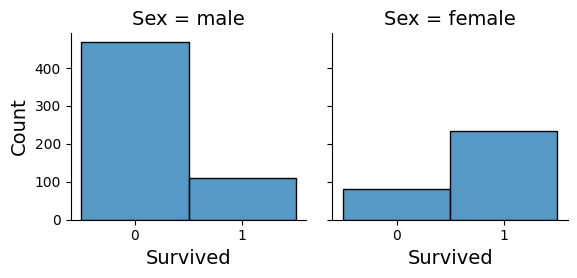

In [148]:
g = sns.FacetGrid(train_data, col="Sex")
g.map_dataframe(sns.histplot, x="Survived")

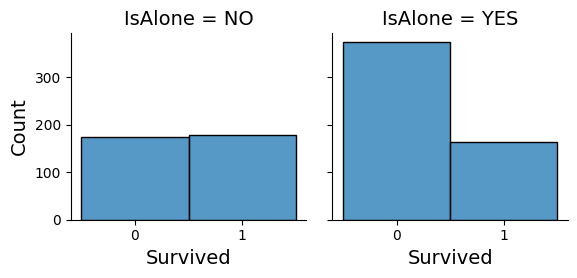

In [147]:
g = sns.FacetGrid(train_data, col="IsAlone")
g.map_dataframe(sns.histplot, x="Survived")

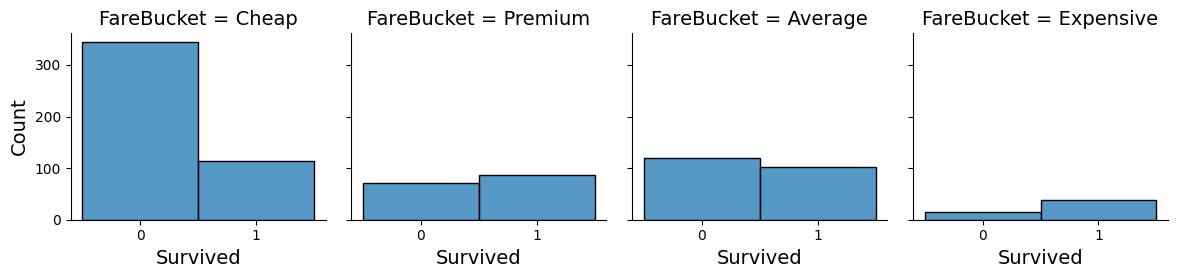

In [150]:
g = sns.FacetGrid(train_data, col="FareBucket")
g.map_dataframe(sns.histplot, x="Survived")

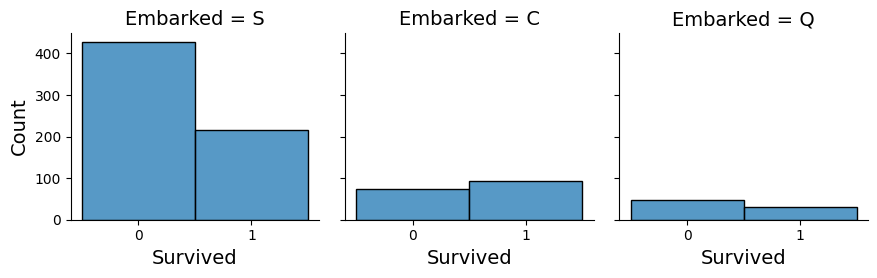

In [151]:
g = sns.FacetGrid(train_data, col="Embarked")
g.map_dataframe(sns.histplot, x="Survived")

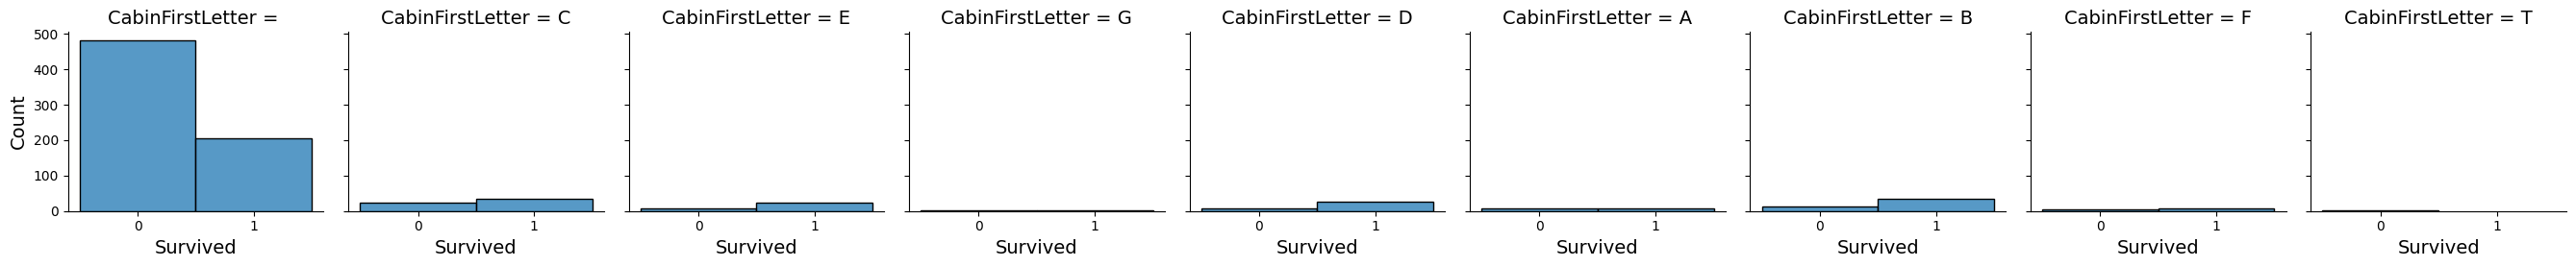

In [152]:
g = sns.FacetGrid(train_data, col="CabinFirstLetter")
g.map_dataframe(sns.histplot, x="Survived")

In [153]:
train_data.CabinFirstLetter.value_counts()

CabinFirstLetter
     687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

## Model Training

### A. Preprocessing

#### 1. Data Cleaning

Fill up missing values and one hot encoding

In [140]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer

# Categorical cols pipeline
cat_pipeline = make_pipeline(
    SimpleImputer(missing_values = None, strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

# Numerical cols pipeline
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)


# # Define cat and num cols
cat_attribs = [train_data.select_dtypes(include='category')]
num_attribs = [train_data.select_dtypes(include=['int', 'float'])]

# Combine all pipelines
prep_pipeline = make_column_transformer(
    (cat_pipeline, make_column_selector(cat_attribs)),
    (num_pipeline, make_column_selector(num_attribs))
)

#### 2. Feature Engineering

In [141]:
from sklearn.preprocessing import FunctionTransformer

# Derive additional columns for both train and test data

# Age group
def age_group(X):
    age_range = [X["Age"].between(0,1), 
                    X["Age"].between(1,12), 
                    X["Age"].between(12,18), 
                    X["Age"].between(18,30), 
                    X["Age"].between(30,60), 
                    X["Age"].between(60,np.inf)]
    age_group = ["Infant", 
                "Kid",
                "Teen",
                "YoungAdult",
                "Adult",
                "Elderly"]
    return np.select(age_range, age_group, None)

train_data["AgeBucket"] = age_group(train_data)
test_data["AgeBucket"] = age_group(test_data)


# Fare group
def fare_group(X):
    fare_range = [X["Fare"].between(0,15), 
                    X["Fare"].between(15,32), 
                    X["Fare"].between(32,100), 
                    X["Fare"].between(100,np.inf)]
    fare_group = ["Cheap", 
                "Average",
                "Premium",
                "Expensive"]
    return np.select(fare_range, fare_group, None)

train_data["FareBucket"] = fare_group(train_data)
test_data["FareBucket"] = fare_group(test_data)


# Total number of family onboard
train_data.FamOnboard = train_data.SibSp + train_data.Parch
train_data["IsAlone"] = np.where(train_data.FamOnboard == 0, 'YES', 'NO')
test_data.FamOnboard = test_data.SibSp + test_data.Parch
test_data["IsAlone"] = np.where(test_data.FamOnboard == 0, 'YES', 'NO')


# First letter of Cabin 
train_data["CabinFirstLetter"] = np.where(train_data.Cabin.notnull(), train_data.Cabin.str[0], 'Z')
test_data["CabinFirstLetter"] = np.where(test_data.Cabin.notnull(), test_data.Cabin.str[0], 'Z')


In [142]:
cat_attribs = ["Pclass", "Sex", "CabinFirstLetter", "AgeBucket", "FareBucket", "IsAlone"]

# Prep pipeline with categories only
prep_pipeline = ColumnTransformer([
    ("cat", cat_pipeline, cat_attribs)
])

train_data_prep = prep_pipeline.fit_transform(train_data)

- Converted to sparse matrix. Got 26 columns based on shape as numpy array
- We can check the 26 cols thru the pipeline 

In [143]:
train_data_prep.toarray().shape

(891, 26)

In [144]:
prep_pipeline.get_feature_names_out()

array(['cat__Pclass_1', 'cat__Pclass_2', 'cat__Pclass_3',
       'cat__Sex_female', 'cat__Sex_male', 'cat__CabinFirstLetter_A',
       'cat__CabinFirstLetter_B', 'cat__CabinFirstLetter_C',
       'cat__CabinFirstLetter_D', 'cat__CabinFirstLetter_E',
       'cat__CabinFirstLetter_F', 'cat__CabinFirstLetter_G',
       'cat__CabinFirstLetter_T', 'cat__CabinFirstLetter_Z',
       'cat__AgeBucket_Adult', 'cat__AgeBucket_Elderly',
       'cat__AgeBucket_Infant', 'cat__AgeBucket_Kid',
       'cat__AgeBucket_Teen', 'cat__AgeBucket_YoungAdult',
       'cat__FareBucket_Average', 'cat__FareBucket_Cheap',
       'cat__FareBucket_Expensive', 'cat__FareBucket_Premium',
       'cat__IsAlone_NO', 'cat__IsAlone_YES'], dtype=object)

Do the same for test data

In [145]:
test_data_prep = prep_pipeline.transform(test_data)

In [146]:
test_data_prep.toarray().shape

(418, 26)

Initialize features and labels

In [148]:
X_train_prep, y_train = train_data_prep, train_data["Survived"]
# No labels for Kaggle test data
X_test_prep = test_data_prep

### B. Shortlisting Model

For classifying whether a passenger survived or not, we are more concerned on false positives (predicted as survived but actually not) as this involves lives
- HENCE, we are more interested in model with higher precision

#### 1. SGD Classifier

In [42]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_prep, y_train)

SGDClassifier(random_state=42)

In [43]:
# Predict y_train using X_train
y_train_pred = sgd_clf.predict(X_train_prep)

- AUC = 0.788 with 90 as false positives. Not bad
- Precision = 0.738 with F1 score = 0.739
- Evaluating at 100 cv folds gave precision of 0.708 

In [44]:
from sklearn.metrics import roc_auc_score

# Get AUC of ROC curve
roc_auc_score(y_train, y_train_pred)

0.7879158278209185

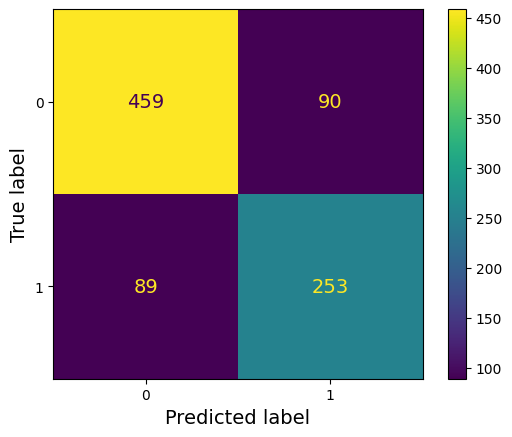

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix to check FP
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [46]:
from sklearn.metrics import precision_score, f1_score

# Get other perf metrics
precision = precision_score(y_train, y_train_pred)
f1_score = f1_score(y_train, y_train_pred)

print(f"Precision = {precision}")
print(f"F1 score = {f1_score}")

Precision = 0.7376093294460642
F1 score = 0.7386861313868612


In [40]:
from sklearn.model_selection import cross_val_score

# Evaluate precision for training data vs validation data
sgd_scores = cross_val_score(sgd_clf, X_train_prep, y_train, cv=100, scoring='precision')
print(f"Ave Precision for 100 cv folds = {sgd_scores.mean()}")

c:\Users\Earl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Earl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Earl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Earl\AppData\Local\Pro

Ave Precision for 10 cv folds = 0.7078095238095237


#### 2. KNN Classifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_prep, y_train)

KNeighborsClassifier()

In [50]:
# Predict y_train using X_train
y_train_pred = knn_clf.predict(X_train_prep)

- AUC = 0.81 with 65 as false positives. 
- Precision = 0.796 with F1 score = 0.769
- Evaluating at 100 cv folds gave precision of 0.772 which beats SGD

In [51]:
from sklearn.metrics import roc_auc_score

# Get AUC of ROC curve
roc_auc_score(y_train, y_train_pred)

0.8121464864346659

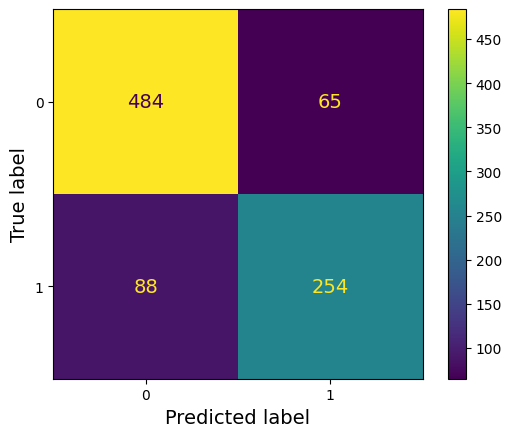

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix to check FP
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [53]:
from sklearn.metrics import precision_score, f1_score

# Get other perf metrics
precision = precision_score(y_train, y_train_pred)
f1_score = f1_score(y_train, y_train_pred)

print(f"Precision = {precision}")
print(f"F1 score = {f1_score}")

Precision = 0.7962382445141066
F1 score = 0.7685325264750379


In [57]:
from sklearn.model_selection import cross_val_score

# Evaluate precision for training data vs validation data
knn_scores = cross_val_score(knn_clf, X_train_prep, y_train, cv=100, scoring='precision')
print(f"Ave Precision for 10 cv folds = {knn_scores.mean()}")

c:\Users\Earl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Ave Precision for 10 cv folds = 0.7715000000000001


c:\Users\Earl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 3. Linear SVM Classifier

In [60]:
from sklearn.svm import SVC

svc_clf = SVC(kernel="linear")
svc_clf.fit(X_train_prep, y_train)

SVC(kernel='linear')

In [61]:
# Predict y_train using X_train
y_train_pred = svc_clf.predict(X_train_prep)

In [62]:
from sklearn.metrics import roc_auc_score

# Get AUC of ROC curve
roc_auc_score(y_train, y_train_pred)

0.7849918512127313

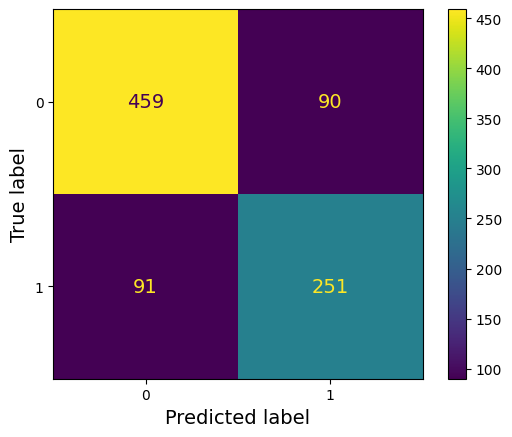

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix to check FP
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [64]:
from sklearn.metrics import precision_score, f1_score

# Get other perf metrics
precision = precision_score(y_train, y_train_pred)
f1_score = f1_score(y_train, y_train_pred)

print(f"Precision = {precision}")
print(f"F1 score = {f1_score}")

Precision = 0.7360703812316716
F1 score = 0.7349926793557834


- In first prediction, it got precision of 0.736 
- With 100 cv it has ave of 0.773, which beats KNN with just a difference of 0.001!

In [65]:
from sklearn.model_selection import cross_val_score

# Evaluate precision for training data vs validation data
svc_scores = cross_val_score(svc_clf, X_train_prep, y_train, cv=100, scoring='precision')
print(f"Ave Precision for 100 cv folds = {svc_scores.mean()}")

Ave Precision for 100 cv folds = 0.7726666666666665


#### 4. Logistic Regression Classifier

In [66]:
from sklearn.linear_model import LogisticRegression

logreg_clf = LogisticRegression(random_state=42)
logreg_clf.fit(X_train_prep, y_train)

LogisticRegression(random_state=42)

In [67]:
# Predict y_train using X_train
y_train_pred = logreg_clf.predict(X_train_prep)

In [68]:
from sklearn.metrics import roc_auc_score

# Get AUC of ROC curve
roc_auc_score(y_train, y_train_pred)

0.7913910459208129

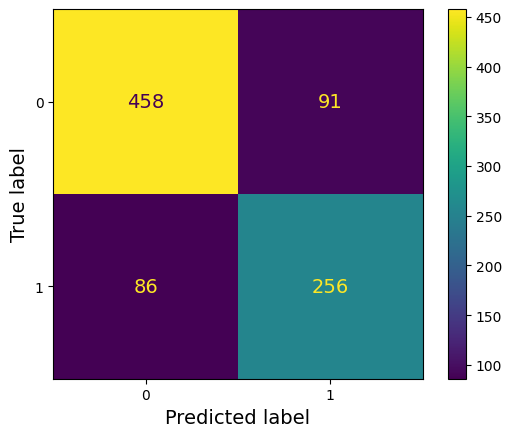

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix to check FP
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [70]:
from sklearn.metrics import precision_score, f1_score

# Get other perf metrics
precision = precision_score(y_train, y_train_pred)
f1_score = f1_score(y_train, y_train_pred)

print(f"Precision = {precision}")
print(f"F1 score = {f1_score}")

Precision = 0.7377521613832853
F1 score = 0.7431059506531204


- Training with 100 cv gave it an overall precision of 0.762
- Logistic Regression is the 2nd worst so far

In [72]:
from sklearn.model_selection import cross_val_score

# Evaluate precision for training data vs validation data
logreg_scores = cross_val_score(logreg_clf, X_train_prep, y_train, cv=100, scoring='precision')
print(f"Ave Precision for 100 cv folds = {logreg_scores.mean()}")

Ave Precision for 100 cv folds = 0.7618333333333334


#### 5. Decision Tree Classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_prep, y_train)

DecisionTreeClassifier(random_state=42)

In [74]:
# Predict y_train using X_train
y_train_pred = tree_clf.predict(X_train_prep)

In [75]:
from sklearn.metrics import roc_auc_score

# Get AUC of ROC curve
roc_auc_score(y_train, y_train_pred)

0.8539449717189148

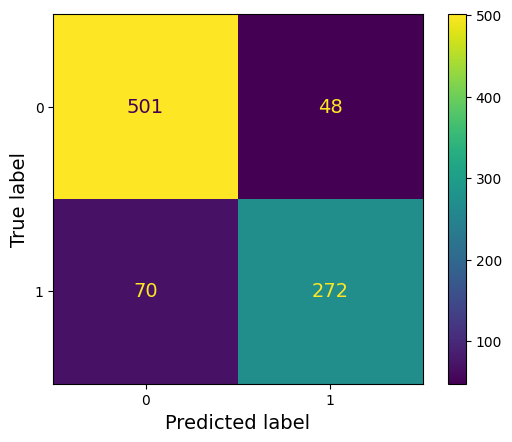

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix to check FP
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [77]:
from sklearn.metrics import precision_score, f1_score

# Get other perf metrics
precision = precision_score(y_train, y_train_pred)
f1_score = f1_score(y_train, y_train_pred)

print(f"Precision = {precision}")
print(f"F1 score = {f1_score}")

Precision = 0.85
F1 score = 0.8217522658610271


- For 10 cv, it got ave of 0.814 precision
- The best model so far

In [78]:
from sklearn.model_selection import cross_val_score

# Evaluate precision for training data vs validation data
tree_scores = cross_val_score(tree_clf, X_train_prep, y_train, cv=100, scoring='precision')
print(f"Ave Precision for 100 cv folds = {tree_scores.mean()}")

Ave Precision for 100 cv folds = 0.8138333333333333


c:\Users\Earl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 6. Random Forest Classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_prep, y_train)

RandomForestClassifier(random_state=42)

In [80]:
# Predict y_train using X_train
y_train_pred = rf_clf.predict(X_train_prep)

In [81]:
from sklearn.metrics import roc_auc_score

# Get AUC of ROC curve
roc_auc_score(y_train, y_train_pred)

0.8561499376857443

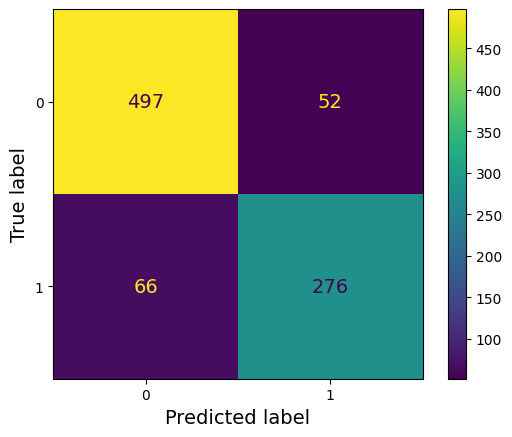

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix to check FP
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [83]:
from sklearn.metrics import precision_score, f1_score

# Get other perf metrics
precision = precision_score(y_train, y_train_pred)
f1_score = f1_score(y_train, y_train_pred)

print(f"Precision = {precision}")
print(f"F1 score = {f1_score}")

Precision = 0.8414634146341463
F1 score = 0.8238805970149253


- For 10 cv, it got ave of 0.820 precision
- New best model after Decision Tree with only diff of 0.006

In [100]:
from sklearn.model_selection import cross_val_score

# Evaluate precision for training data vs validation data
rf_scores = cross_val_score(rf_clf, X_train_prep, y_train, cv=100, scoring='precision')
print(f"Ave Precision for 100 cv folds = {rf_scores.mean()}")

Ave Precision for 100 cv folds = 0.8203809523809525


In [92]:
# from sklearn.model_selection import cross_val_score

# # Evaluate precision for training data vs validation data
# rf_scores = cross_val_score(rf_clf, X_train_prep, y_train, cv=100, scoring='accuracy')
# print(f"Ave Accuracy for 100 cv folds = {rf_scores.mean()}")

Ave Accuracy for 100 cv folds = 0.8186111111111112


#### 7. Gaussian Naive Bayes Classifier

In [85]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
# Need to pass dense matrix
nb_clf.fit(X_train_prep.toarray(), y_train)

GaussianNB()

In [86]:
# Predict y_train using X_train
y_train_pred = nb_clf.predict(X_train_prep.toarray())

In [87]:
from sklearn.metrics import roc_auc_score

# Get AUC of ROC curve
roc_auc_score(y_train, y_train_pred)

0.7438644425270827

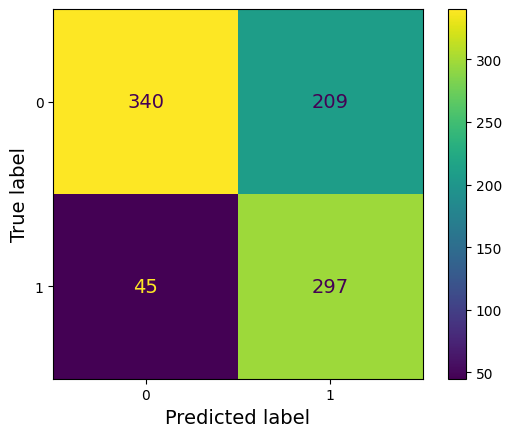

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix to check FP
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [89]:
from sklearn.metrics import precision_score, f1_score

# Get other perf metrics
precision = precision_score(y_train, y_train_pred)
f1_score = f1_score(y_train, y_train_pred)

print(f"Precision = {precision}")
print(f"F1 score = {f1_score}")

Precision = 0.5869565217391305
F1 score = 0.7004716981132076


- Fo 100 cv, it got an ave of 0.603 precision
- Worst model so far beating SGD

In [90]:
from sklearn.model_selection import cross_val_score

# Evaluate precision for training data vs validation data
nb_scores = cross_val_score(nb_clf, X_train_prep.toarray(), y_train, cv=100, scoring='precision')
print(f"Ave Precision for 100 cv folds = {nb_scores.mean()}")

Ave Precision for 100 cv folds = 0.6026428571428571


#### 8. AdaBoost Classifier

In [93]:
from sklearn.ensemble import AdaBoostClassifier

adb_clf = AdaBoostClassifier(random_state=42)
adb_clf.fit(X_train_prep, y_train)

AdaBoostClassifier(random_state=42)

In [94]:
# Predict y_train using X_train
y_train_pred = adb_clf.predict(X_train_prep)

In [95]:
from sklearn.metrics import roc_auc_score

# Get AUC of ROC curve
roc_auc_score(y_train, y_train_pred)

0.7990844597833382

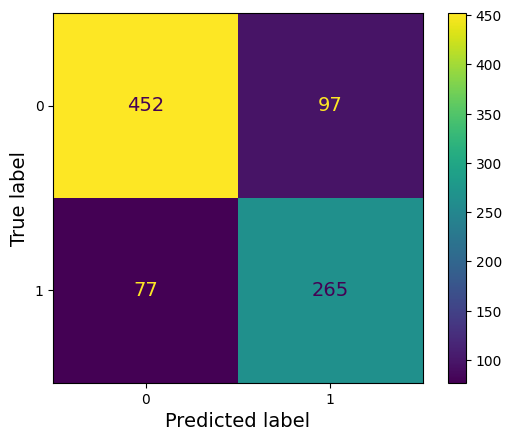

In [96]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix to check FP
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

In [97]:
from sklearn.metrics import precision_score, f1_score

# Get other perf metrics
precision = precision_score(y_train, y_train_pred)
f1_score = f1_score(y_train, y_train_pred)

print(f"Precision = {precision}")
print(f"F1 score = {f1_score}")

Precision = 0.7320441988950276
F1 score = 0.7528409090909091


- For 10 cv, it got ave of 0.734 precision. Low score is somehow surprising for an ensemble model
- 3rd worst model

In [98]:
from sklearn.model_selection import cross_val_score

# Evaluate precision for training data vs validation data
adb_scores = cross_val_score(adb_clf, X_train_prep, y_train, cv=100, scoring='precision')
print(f"Ave Precision for 100 cv folds = {adb_scores.mean()}")

Ave Precision for 100 cv folds = 0.733952380952381


### COMPARE TOGETHER

- SGD, KNN, and Decision Tree have large outliers far from the median. Thus, these model's won't generalize well even with Decision Tree having high average precision
- Linear SVM and Logistic Regression have almost similar distribution (almost same variance) but with Logistic Regression having more scores under median
- GaussianNB and AdaBoost have wider spread and lower average precision than the Random Forest
and Random Forest have wider spread with majority of lower precision under median and presence of outliers. Unfortunately, these models won't generalize 
- Random Forest have high average precision due to most values falling above median, but with same variability as Linear SVM (one with reasonable variance) 

**CONCLUSION**: Use Random Forest as final model

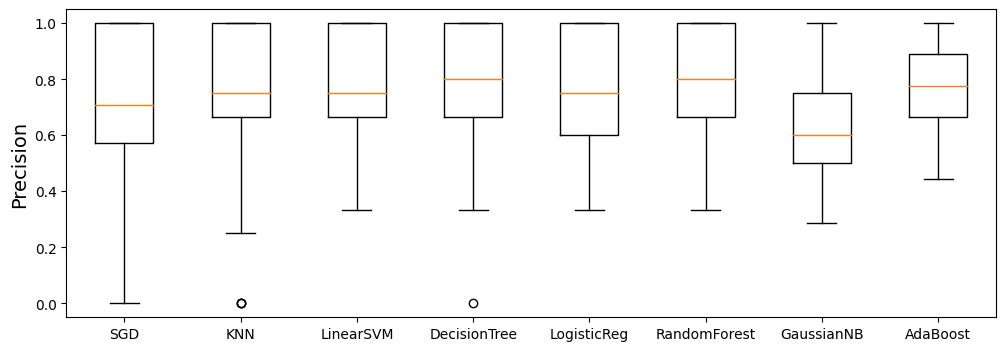

In [101]:
plt.figure(figsize=(12, 4))

# Plot each precision scores per model
plt.boxplot([sgd_scores, knn_scores, svc_scores, tree_scores, logreg_scores, rf_scores, nb_scores, adb_scores], 
            labels=("SGD", "KNN", "LinearSVM", "DecisionTree", "LogisticReg", "RandomForest", "GaussianNB", "AdaBoost"))
plt.ylabel("Precision")
plt.show()

### C. Fine tuning

In [105]:
from sklearn.model_selection import GridSearchCV

# Initialize classifier
rf_clf = RandomForestClassifier(random_state=42)

# Set hyperparameter values for tuning
param_grid = {'n_estimators':[50, 100, 150], 
              'criterion':['gini', 'entropy', 'log_loss'],
              'max_depth':[None, 5, 8],
              'max_leaf_nodes':[None, 10, 15],
              'bootstrap':[True,False]}

# Search for best params and train the best estimator
grid_search = GridSearchCV(rf_clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train_prep, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 8],
                         'max_leaf_nodes': [None, 10, 15],
                         'n_estimators': [50, 100, 150]})

In [106]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_leaf_nodes': None,
 'n_estimators': 150}

In [107]:
grid_search.best_score_

0.8114619295712762

Seems like the best score was obtained from default settings aside from n_estimator which looks like the higher is better

Do Grid Search again for higher ```n_estimator``` and removing other param options

In [108]:
from sklearn.model_selection import GridSearchCV

# Initialize classifier
rf_clf = RandomForestClassifier(criterion='gini', random_state=42)

# Set hyperparameter values for tuning
param_grid = {'n_estimators':[150, 200, 250], 
              'max_depth':[None, 10, 20],
              'max_leaf_nodes':[None, 20, 30]}

# Search for best params and train the best estimator
grid_search = GridSearchCV(rf_clf, param_grid=param_grid, cv=10)
grid_search.fit(X_train_prep, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'max_leaf_nodes': [None, 20, 30],
                         'n_estimators': [150, 200, 250]})

In [109]:
grid_search.best_params_

{'max_depth': None, 'max_leaf_nodes': None, 'n_estimators': 200}

In [110]:
grid_search.best_score_

0.818214731585518

```n_estimator``` = 250 seems worse than 200 so we should not exceed to 200 that much. Still no changes in max params

Try again with higher values for max params while within 200 only for ```n_estimator```

In [111]:
from sklearn.model_selection import GridSearchCV

# Initialize classifier
rf_clf = RandomForestClassifier(criterion='gini', random_state=42)

# Set hyperparameter values for tuning
param_grid = {'n_estimators':[200, 210, 220], 
              'max_depth':[None, 100, 200],
              'max_leaf_nodes':[None, 200, 300]}

# Search for best params and train the best estimator
grid_search = GridSearchCV(rf_clf, param_grid=param_grid, cv=10)
grid_search.fit(X_train_prep, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 100, 200],
                         'max_leaf_nodes': [None, 200, 300],
                         'n_estimators': [200, 210, 220]})

In [114]:
grid_search.best_params_

{'max_depth': None, 'max_leaf_nodes': 200, 'n_estimators': 200}

In [115]:
grid_search.best_score_

0.819338327091136

No changes in score of the best estimator even when the 2 params have new best values

Keep changing again

In [119]:
from sklearn.model_selection import GridSearchCV

# Initialize classifier
rf_clf = RandomForestClassifier(criterion='gini', random_state=42)

# Set hyperparameter values for tuning
param_grid = {'n_estimators':[185, 190, 195], 
              'max_depth':[None, 500, 600, 700],
              'max_leaf_nodes':[130, 140, 150]}

# Search for best params and train the best estimator
grid_search = GridSearchCV(rf_clf, param_grid=param_grid, cv=10)
grid_search.fit(X_train_prep, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 500, 600, 700],
                         'max_leaf_nodes': [130, 140, 150],
                         'n_estimators': [185, 190, 195]})

In [120]:
grid_search.best_params_

{'max_depth': None, 'max_leaf_nodes': 130, 'n_estimators': 185}

In [122]:
grid_search.best_score_

0.819338327091136

Since there are no changes in score anymore after 3 tries, we'll just use the final parameters:

- ```n_estimator = 185```
- ```max_leaf_nodes = 130```

### D. Evaluation

In [149]:
# Train using best model with best params
rf_clf = RandomForestClassifier(n_estimators=185, max_leaf_nodes=130, random_state=42)
rf_clf.fit(X_train_prep, y_train)

# Get predictions for given test set. 
# Only Kaggle has the true labels to check
y_test_pred = rf_clf.predict(X_test_prep)

In [150]:
y_test_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

## 4. Spam classifier

Exercise: _Build a spam classifier (a more challenging exercise):_

* _Download examples of spam and ham from [Apache SpamAssassin's public datasets](https://homl.info/spamassassin)._
* _Unzip the datasets and familiarize yourself with the data format._
* _Split the datasets into a training set and a test set._
* _Write a data preparation pipeline to convert each email into a feature vector. Your preparation pipeline should transform an email into a (sparse) vector that indicates the presence or absence of each possible word. For example, if all emails only ever contain four words, "Hello," "how," "are," "you," then the email "Hello you Hello Hello you" would be converted into a vector [1, 0, 0, 1] (meaning [“Hello" is present, "how" is absent, "are" is absent, "you" is present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of each word._

_You may want to add hyperparameters to your preparation pipeline to control whether or not to strip off email headers, convert each email to lowercase, remove punctuation, replace all URLs with "URL," replace all numbers with "NUMBER," or even perform _stemming_ (i.e., trim off word endings; there are Python libraries available to do this)._

_Finally, try out several classifiers and see if you can build a great spam classifier, with both high recall and high precision._